# **Feedforward Neural Network**

## Single-layer Perceptron(20pt)
A single layer perceptron predicts a binary label $\hat{y}$ for a given input vector $\boldsymbol{x} \in \mathbb{R}^d$ ($d$ presents the number of dimensions of inputs) by using the following formula,

$$
\hat{y} = \begin{cases}
1 & \text{if }\boldsymbol{w} \cdot \boldsymbol{x} + b>0\\
0 & \text{else}
\end{cases}
$$


In [1]:
!gdown --id '1TpMVIPzhCRVkl3HD_QgXbIAf3fL698Ul' --output data.xlsx

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TpMVIPzhCRVkl3HD_QgXbIAf3fL698Ul
To: /content/data.xlsx
100% 9.64k/9.64k [00:00<00:00, 14.2MB/s]


In [2]:
# import some useful package
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm  
import math

In [3]:
# read the Excel file
df = pd.read_excel('data.xlsx')
# select the list where we are interested. 
# <hint>: you need to change the format into float for the later calculation
lst=df.values.tolist()
# change the list to NumPy array
arr=np.array(lst)
# print the NumPy array
print(arr)

[[ 1.  2.  3.  2.]
 [ 1.  5. 14.  7.]
 [ 1.  5. 13.  7.]
 [ 1.  5. 13.  6.]
 [ 1.  5. 15.  8.]
 [ 1.  5. 14.  8.]
 [ 1.  5. 13.  8.]
 [ 1.  2.  2.  0.]
 [ 1.  5. 16.  8.]
 [ 1.  3.  3.  0.]
 [ 1.  5. 15.  6.]
 [ 1.  5. 16.  7.]
 [ 1.  5. 16.  6.]
 [ 1.  5. 15.  7.]
 [ 1.  2.  5.  0.]
 [ 1.  4. 11.  8.]
 [ 1.  3.  1.  1.]
 [ 1.  3. 11.  7.]
 [ 1.  2.  6.  0.]
 [ 1.  4. 10. 10.]
 [ 1.  2.  6.  2.]
 [ 1.  4. 11. 10.]
 [ 1.  2.  5.  2.]
 [ 1.  2.  7.  4.]
 [ 1.  3.  6.  6.]
 [ 1.  2.  7.  3.]
 [ 0.  1.  2.  0.]
 [ 0.  1.  3.  0.]
 [ 0.  1.  4.  0.]
 [ 0.  1.  6.  1.]
 [ 0.  1.  5.  1.]
 [ 0.  1.  7.  1.]
 [ 0.  1.  4.  1.]
 [ 0.  1.  2.  0.]
 [ 0.  1.  5.  2.]
 [ 0.  1.  7.  3.]
 [ 0.  1.  4.  7.]
 [ 0.  1.  8.  2.]
 [ 0.  1. 10.  5.]
 [ 0.  1. 11.  5.]
 [ 0.  1.  9.  6.]
 [ 0.  1.  9.  5.]
 [ 0.  1.  9.  2.]
 [ 0.  1. 10.  3.]
 [ 0.  1. 12.  2.]
 [ 0.  1. 12.  4.]
 [ 0.  1. 12.  3.]
 [ 0.  1. 10.  4.]
 [ 0.  1. 11.  3.]
 [ 0.  1. 14.  3.]
 [ 0.  1. 15.  4.]
 [ 0.  1. 14.  4.]]


Taka a look at the equation, $\boldsymbol{w}$ is a weight vector; $b$ is a bias weight; and $g(.)$ denotes a Heaviside step function (we assume $g(0)=0$).

$$
\hat{y} = g(\boldsymbol{w} \cdot \boldsymbol{x} + b) = g(w_1 x_1 + w_2 x_2 + ... + w_d x_d + b)
$$
 

In order to train a weight vector and bias weight in a unified code, we include a bias term as an additional dimension to inputs. 
More concretely, we append  1  to each input,
Then, the formula of the single-layer perceptron becomes,

$$
\hat{y} = g((w_1, w_2,	\ldots , w_n) \cdot \boldsymbol{x}') = g(w_1 x_1 + w_2 x_2 +	\ldots + w_n)
$$

In other words, $w_1$ and $w_2$ present weights for $x_1$ and $x_2$, respectively, and $w_n$ does a bias weight.



### Steps


1.   Initialize the weights and the threshold. Weights may be initialized to 0 or to a small random value. In the example below, we use 0
2.   For each example $i$, perform the following steps over the input $x_i$ and desired output $o$ :
  *   Calculate the actual output:
  $$
  \hat{y} = g(w_1 x_1 + w_2 x_2 +	\ldots + w_n)
  $$
  *   Update the weights:
  $$
  w_i(t+1) = w_i(t) + \alpha \cdot (o - \hat{y}(t))x_i
  $$
  $\alpha$ means learning rate. In the example below, we use 0.5
  And the steps of the training is set as a fixed number of iterations (200 times)




In [4]:
# Data setting
b = 1
x = np.hstack(([row[1:4] for row in arr],np.ones((len(arr),1))))
y = [row[0] for row in arr]
w = [0]*x.shape[1]
# Hyperparameter setting
alpha = 0.5
step = 200

# Training loop
for t in tqdm(range(step)):
    for i in range(len(y)):
        y_pred = np.heaviside(np.dot(x[i], w), 0)
        w += alpha * (y[i] - y_pred) * x[i]

  0%|          | 0/200 [00:00<?, ?it/s]

In [5]:
w

array([ 14. ,  -1.5,  -1. , -12.5])

In [6]:
# To see the prediction
np.heaviside(np.dot(x, w), 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

## Single-layer Perceptron with batch(20pt)
In order to reduce the execusion run by the Python interpreter, which is relatively slow. The common technique to speed up a machine-learning code written in Python is to to execute computations within the matrix library (e.g., numpy).
The single-layer perceptron makes predictions for four inputs,
$$
\hat{y}_1 = g(\boldsymbol{x}_1 \cdot \boldsymbol{w}) \\
\hat{y}_2 = g(\boldsymbol{x}_2 \cdot \boldsymbol{w}) \\
\vdots \\
\hat{y}_n = g(\boldsymbol{x}_n \cdot \boldsymbol{w}) \\
$$

Here, we define $\hat{Y} \in \mathbb{R}^{n \times 1}$ and $X \in \mathbb{R}^{n \times d}$ as,
$$
\hat{Y} = \begin{pmatrix} 
  \hat{y}_1 \\ 
  \hat{y}_2 \\ 
  \vdots \\ 
  \hat{y}_n \\ 
\end{pmatrix},
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \vdots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix}
$$

Then, we can write the all predictions in one dot-product computation,
$$
\hat{Y} = X \cdot \boldsymbol{w}
$$

In [7]:
x

array([[ 2.,  3.,  2.,  1.],
       [ 5., 14.,  7.,  1.],
       [ 5., 13.,  7.,  1.],
       [ 5., 13.,  6.,  1.],
       [ 5., 15.,  8.,  1.],
       [ 5., 14.,  8.,  1.],
       [ 5., 13.,  8.,  1.],
       [ 2.,  2.,  0.,  1.],
       [ 5., 16.,  8.,  1.],
       [ 3.,  3.,  0.,  1.],
       [ 5., 15.,  6.,  1.],
       [ 5., 16.,  7.,  1.],
       [ 5., 16.,  6.,  1.],
       [ 5., 15.,  7.,  1.],
       [ 2.,  5.,  0.,  1.],
       [ 4., 11.,  8.,  1.],
       [ 3.,  1.,  1.,  1.],
       [ 3., 11.,  7.,  1.],
       [ 2.,  6.,  0.,  1.],
       [ 4., 10., 10.,  1.],
       [ 2.,  6.,  2.,  1.],
       [ 4., 11., 10.,  1.],
       [ 2.,  5.,  2.,  1.],
       [ 2.,  7.,  4.,  1.],
       [ 3.,  6.,  6.,  1.],
       [ 2.,  7.,  3.,  1.],
       [ 1.,  2.,  0.,  1.],
       [ 1.,  3.,  0.,  1.],
       [ 1.,  4.,  0.,  1.],
       [ 1.,  6.,  1.,  1.],
       [ 1.,  5.,  1.,  1.],
       [ 1.,  7.,  1.,  1.],
       [ 1.,  4.,  1.,  1.],
       [ 1.,  2.,  0.,  1.],
       [ 1.,  

In [8]:
# Data setting
b = 1
x = np.hstack(([row[1:4] for row in arr],np.ones((len(arr),1))))
y = [row[0] for row in arr]
w = np.array([0.0]*x.shape[1])
# Hyperparameter setting
alpha = 0.5
step = 200

# Training loop
for t in tqdm(range(step)):
  y_pred= np.heaviside(np.dot(x, w), 0)
  w += alpha * np.dot(y - y_pred,x)

  0%|          | 0/200 [00:00<?, ?it/s]

In [9]:
# To see the value of weight vector
w

array([ 251.5,  -58. ,   15. , -137. ])

In [10]:
# To see the prediction
np.heaviside(np.dot(x, w), 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

## Single-layer Perceptron with different activation function
### ReLU Function
The most popular choice,
due to both simplicity of implementation and
its good performance on a variety of predictive tasks,
is the *rectified linear unit* (*ReLU*).
[**ReLU provides a very simple nonlinear transformation**].
Given an element $x$, the function is defined
as the maximum of that element and $0$:

$$\operatorname{ReLU}(x) = \max(x, 0).$$
### sigmoid function
[**The *sigmoid function* transforms its inputs**],
for which values lie in the domain $\mathbb{R}$,
(**to outputs that lie on the interval (0, 1).**)
For that reason, the sigmoid is
often called a *squashing function*:
it squashes any input in the range (-inf, inf)
to some value in the range (0, 1):

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$




## Define and plot the function (10pt)

In [11]:
# define the activation function
def ReLU(x): 
    for i in range(len(x)):
        if x[i] <= 0:
            x[i]=0;
    return x

def sigmoid(x):
    y=[0.0]*len(x)
    for i in range(len(x)):
        try:
            y[i]=1/(1+math.exp(-x[i]))
        except OverflowError:
            y[i]=0
    return y

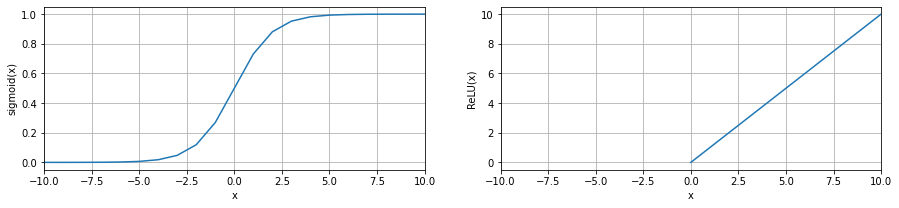

In [12]:
# Plot the two activation functions with x from -10 to 10
# <hint>some useful funtions in plt: plot, subplot, xlabel, ylebel, grid, figsize 
x_relu=np.arange(-10.0,11.0)
y_relu=ReLU(x_relu)

x_sigmoid=np.arange(-10.0,11.0)
y_sigmoid=sigmoid(x_sigmoid)

plt.figure(figsize=(15,3))
plt.subplot(121,xlabel="x",ylabel="sigmoid(x)")
plt.xlim([-10,10])
plt.plot(x_sigmoid, y_sigmoid) 
plt.grid()
plt.subplot(122,xlabel="x",ylabel="ReLU(x)")
plt.xlim([-10,10])
plt.plot(x_relu, y_relu) 
plt.grid()
plt.show()

## Single-layer Perceptron with sigmoid(20pt)

---
maybe you will meet the warning --RuntimeWarning: overflow encountered in exp-- 

It is because of the calculation with the exponential function.
It is OK if you don't solve this problem and the code still works.



In [13]:
# Training data
# Data setting
b = 1
x = np.hstack(([row[1:4] for row in arr],np.ones((len(arr),1))))
y = [row[0] for row in arr]
w = [0.0]*x.shape[1]
# Hyperparameter setting
alpha = 0.5
step = 200

# Training data
for t in tqdm(range(step)):
    y_pred= sigmoid(np.dot(x, w))
    w += alpha * np.dot(np.array(y) - y_pred,x)

  0%|          | 0/200 [00:00<?, ?it/s]

In [14]:
w

array([ 251.01098164,  -57.39359318,   15.0187349 , -140.49363251])

In [15]:
# To see the prediction
result=sigmoid(np.dot(x, w))
print(result)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999649598647, 1.0, 1.0, 1.0, 1.0, 0.9999999976007703, 1.0, 0.9920719080599589, 0.013791202053216973, 1.659252317265756e-27, 1.9687547407253414e-52, 9.232167572207147e-96, 7.780804343320589e-71, 1.0954255411199422e-120, 6.557605866177949e-46, 0.013791202053216973, 2.5916609697429866e-64, 1.2153188951408053e-107, 8.955030796024431e-07, 4.329280652292112e-139, 2.2523464310412397e-169, 2.672479446149248e-194, 6.322803707812921e-138, 1.8982613515452637e-144, 5.136826822201419e-164, 2.0301484802695055e-182, 8.580892807803656e-239, 9.520063915835947e-226, 2.858157588118936e-232, 6.762098552978266e-176, 2.4088346319101592e-207, 4.023875533200638e-282, 1.590293985231233e-300, 1.340288318064723e-275]


## Single-layer Perceptron with ReLU(20pt)




In [16]:
# Training data
# Data setting
b = 1
x = np.hstack(([row[1:4] for row in arr],np.ones((len(arr),1))))
y = [row[0] for row in arr]
w = [0.0]*x.shape[1]
# Hyperparameter setting
alpha = 0.5
step = 200

# Training data
for t in tqdm(range(step)):
    y_pred= ReLU(np.dot(x, w))
    w += alpha * np.dot(np.array(y) - y_pred,x)

  0%|          | 0/200 [00:00<?, ?it/s]

In [17]:
w

array([-104291.5 , -417247.75, -191095.25,  -37176.25])

In [18]:
# To see the prediction
result=ReLU(np.dot(x, w))
print(result)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Bouns part (10pt)
Adjust the hyperparameter to let the model with ReLU function to get a better result.

In [49]:
# Training data
# Data setting
b = 1
x = np.hstack(([row[1:4] for row in arr],np.ones((len(arr),1))))
y = [row[0] for row in arr]
w = [0.0]*x.shape[1]
# Hyperparameter setting
alpha = 0.05
step = 199

for t in tqdm(range(step)):
    y_pred= ReLU(np.dot(x, w))
    w += alpha * np.dot(np.array(y) - y_pred,x)
      
# To see the prediction
result=ReLU(np.dot(x, w))
print(alpha,step,result)


  0%|          | 0/199 [00:00<?, ?it/s]

0.05 199 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [97]:
# Training data
# Data setting
b = 1
x = np.hstack(([row[1:4] for row in arr],np.ones((len(arr),1))))
y = [row[0] for row in arr]
w = [0.0]*x.shape[1]
# Hyperparameter setting
alpha = 0.001
step = 200

for t in tqdm(range(step)):
    y_pred= ReLU(np.dot(x, w))
    w += alpha * np.dot(np.array(y) - y_pred,x)
      
# To see the prediction
result=ReLU(np.dot(x, w))
print(alpha,step,result)


  0%|          | 0/200 [00:00<?, ?it/s]

0.001 200 [1.2909661  2.20754105 2.35822719 2.34284089 2.0722412  2.22292734
 2.37361348 1.41087965 1.92155507 2.09259051 2.04146862 1.90616877
 1.89078248 2.05685491 0.95882124 1.84258875 2.40934908 0.99480546
 0.8081351  2.02404747 0.83890768 1.87336134 0.98959382 0.71899413
 1.73284985 0.70360784 0.57848265 0.42779651 0.27711037 0.
 0.14181053 0.         0.29249666 0.57848265 0.15719682 0.
 0.38481442 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
